### Predictive Analytics for Breast Cancer Dataset ###

**1. Import Dependencies & Setup**

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder


**2. Load Raw Image Data**

In [8]:
#Define the path to the dataset
data_dir = 'C:/Users/sue/Desktop/PLP 2025/AI for Software Eng/Week 4/BC_data/training_set'
categories = ['benign', 'malignant']
# Initialize lists
image_data = []
labels = []
# Load images and labels
for category in categories:
    category_path = os.path.join(data_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        if os.path.isfile(img_path):
            # Read and resize the image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
            image_data.append(img)
            labels.append(category)

**3. Clean the Data (Basic Check)**

In [16]:
# Remove any images that are too small or failed to load
cleaned_images = []
cleaned_labels = []

for img, label in zip(image_data, labels):
    if img.shape[0] > 50 and img.shape[1] > 50:
        cleaned_images.append(img)
        cleaned_labels.append(label)

print(f"Total images after cleaning: {len(cleaned_images)}")

Total images after cleaning: 1112


**4. Preprocess and Extract Features**

In [17]:
# Resize and flatten images
image_features = []
for img in cleaned_images:
    resized = cv2.resize(img, (64, 64))
    flattened = resized.flatten()
    image_features.append(flattened)

X = np.array(image_features)


**5. Encode Labels**

In [19]:
# Map benign/malignant to priority labels
priority_map = {'benign': 'low', 'malignant': 'high'}
priority_labels = [priority_map[label] for label in cleaned_labels]

# Encode labels (low=0, medium=1, high=2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(priority_labels)


**6. Split Dataset**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**7. Train the Model**

In [21]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**8. Evaluate Model Performance**

In [22]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.8161
F1 Score (weighted): 0.8038

Classification Report:
               precision    recall  f1-score   support

        high       0.77      0.52      0.62        64
         low       0.83      0.94      0.88       159

    accuracy                           0.82       223
   macro avg       0.80      0.73      0.75       223
weighted avg       0.81      0.82      0.80       223



**Visualize Random Test Images with True and Predicted Labels**

This grid shows a random sample of test images. Each image displays its true label and the model's predicted label. Green titles indicate correct predictions; red titles indicate misclassifications.

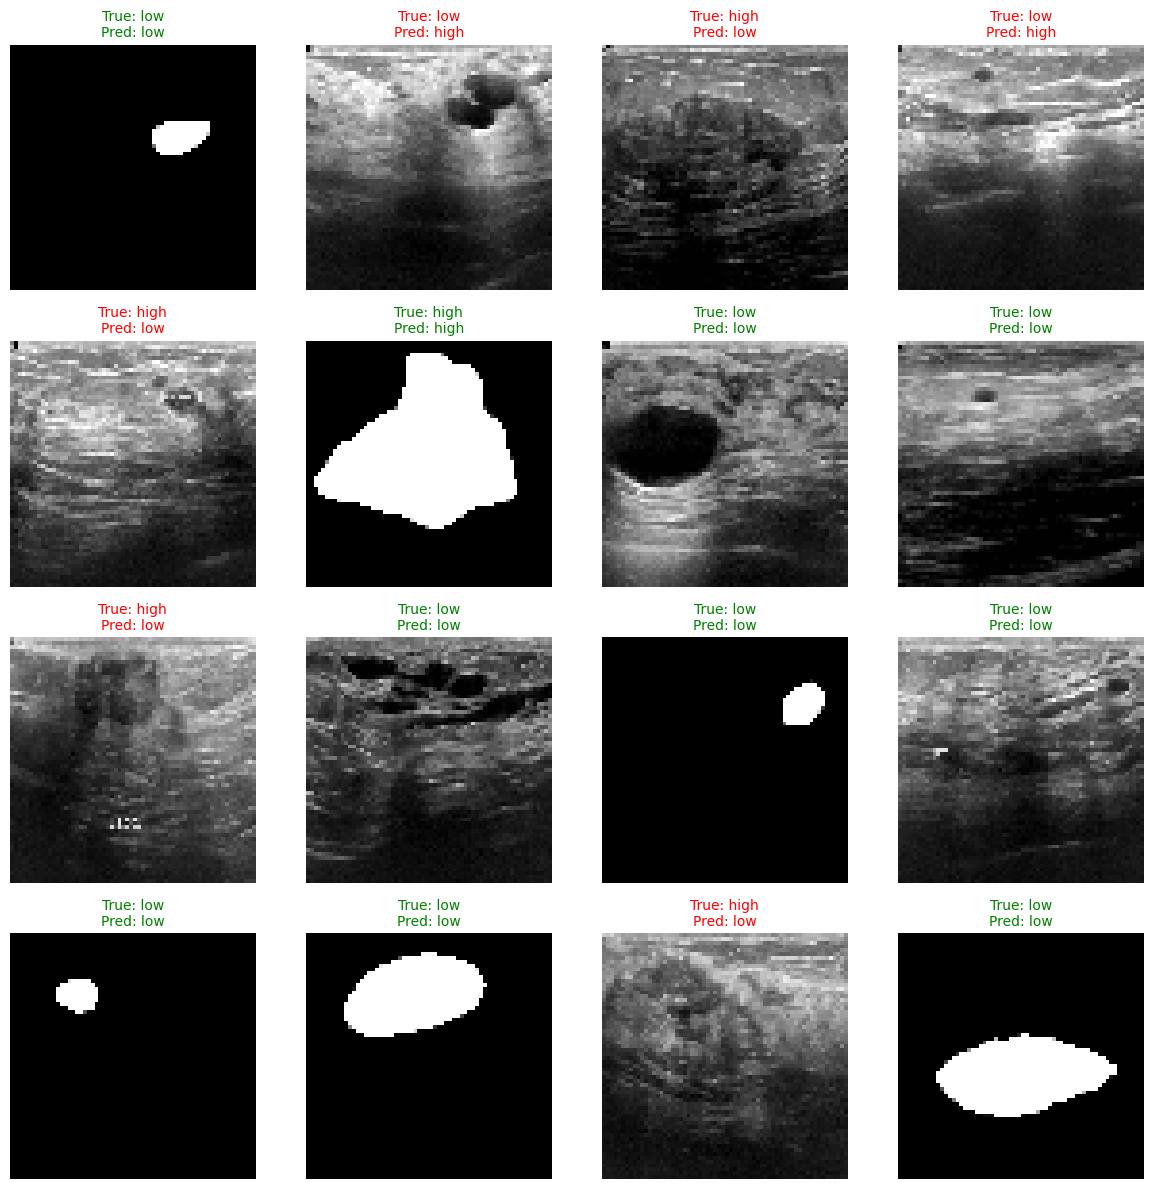

In [33]:
import random
import math

# Set the number of images to display (e.g., 16 for a 4x4 grid)
num_images = 16
grid_size = int(math.ceil(num_images ** 0.5))

indices = list(range(len(X_test)))
random.shuffle(indices)
sample_indices = indices[:num_images]

plt.figure(figsize=(grid_size * 3, grid_size * 3))

for i, idx in enumerate(sample_indices):
    image = X_test[idx].reshape(64, 64, 3)
    true_label = label_encoder.inverse_transform([y_test[idx]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[idx]])[0]
    correct = true_label == pred_label

    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(image.astype('uint8'))
    title_color = 'green' if correct else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Parameters of the Forest**

In [ ]:
# Print the number of trees, max depth of first 5 trees, and classes
print(f"Number of trees: {len(clf.estimators_)}")
print(f"Max depth of first 5 trees: {[tree.get_depth() for tree in clf.estimators_[:5]]}")
print(f"Classes (encoded): {clf.classes_}")

# Print the mapping from encoded label to original class
for i, class_index in enumerate(clf.classes_):
    print(f"Class {class_index}: {label_encoder.inverse_transform([class_index])[0]}")

Number of trees: 100
Max depth of first 5 trees: [17, 20, 13, 14, 21]
Classes (encoded): [0 1]
Class 0: high
Class 1: low
